# Step 1 : Import the required libraries

In [1]:
from textblob import TextBlob
import nltk

In [2]:
b = TextBlob("I havv good speling")
b.correct()

TextBlob("I have good spelling")

# Step 2 : Text Analytics

In [3]:
b1 = TextBlob("Beautiful is better than ugly."
             "Explicit is better than implicit."
             "Simple is better than complex.")
b1.words

WordList(['Beautiful', 'is', 'better', 'than', 'ugly.Explicit', 'is', 'better', 'than', 'implicit.Simple', 'is', 'better', 'than', 'complex'])

In [4]:
b1.sentences

[Sentence("Beautiful is better than ugly.Explicit is better than implicit.Simple is better than complex.")]

In [5]:
sentence = TextBlob("Use 4 spaces per indentation level")
sentence.words

WordList(['Use', '4', 'spaces', 'per', 'indentation', 'level'])

In [6]:
sentence.words[2].singularize()

'space'

In [7]:
sentence.words[5].pluralize()

'levels'

In [8]:
b2 = TextBlob("And now for something completely different.")
print(b2.parse())

And/CC/O/O now/RB/B-ADVP/O for/IN/B-PP/B-PNP something/NN/B-NP/I-PNP completely/RB/B-ADJP/O different/JJ/I-ADJP/O ././O/O


In [9]:
b1.upper()

TextBlob("BEAUTIFUL IS BETTER THAN UGLY.EXPLICIT IS BETTER THAN IMPLICIT.SIMPLE IS BETTER THAN COMPLEX.")

In [10]:
b1.find("Simple")

63

In [11]:
blob = TextBlob("Now is better than never")
blob.ngrams(n=3)

[WordList(['Now', 'is', 'better']),
 WordList(['is', 'better', 'than']),
 WordList(['better', 'than', 'never'])]

In [12]:
from nltk import tokenize
from nltk.tokenize import sent_tokenize

text = """Good day everyone, how are you all today? It's so fun learning data science. Hope you are practising well."""
text

"Good day everyone, how are you all today? It's so fun learning data science. Hope you are practising well."

In [13]:
tokenized_text = sent_tokenize(text)
tokenized_text

['Good day everyone, how are you all today?',
 "It's so fun learning data science.",
 'Hope you are practising well.']

In [14]:
from nltk.tokenize import word_tokenize
tokenized_words = word_tokenize(text)
print(tokenized_words)

['Good', 'day', 'everyone', ',', 'how', 'are', 'you', 'all', 'today', '?', 'It', "'s", 'so', 'fun', 'learning', 'data', 'science', '.', 'Hope', 'you', 'are', 'practising', 'well', '.']


In [15]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'are': 2, 'you': 2, '.': 2, 'Good': 1, 'day': 1, 'everyone': 1, ',': 1, 'how': 1, 'all': 1, 'today': 1, ...})

In [16]:
fdist.most_common(4)

[('are', 2), ('you', 2), ('.', 2), ('Good', 1)]

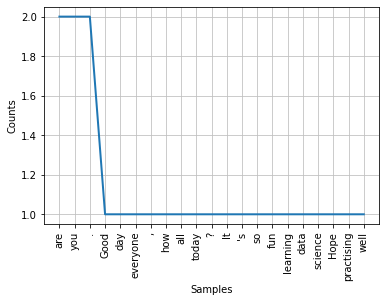

In [17]:
import matplotlib.pyplot as plt
fdist.plot(30, cumulative=False)
plt.show()

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'when', 'about', 'herself', 'no', "hasn't", "mustn't", 'while', 'shan', 'she', 'only', 'is', 'because', 'should', 'will', 'ma', "haven't", 'has', 'weren', 'it', 'against', 'where', 'hasn', 'than', 's', 'your', 'isn', 'doesn', "couldn't", 'the', 'and', 'during', 'be', 'he', 'same', 'me', 'couldn', 'out', 'there', 'those', 'to', 'yours', 'off', 'd', 'didn', "she's", 'do', 'very', 'ain', "isn't", 'at', 'such', 'an', 'won', 'you', 'hers', 't', 'between', "needn't", 'or', "won't", 'down', "it's", 'how', 'through', 'had', 'him', 'up', "aren't", 'just', 'own', 'before', 'themselves', 'being', "weren't", 'does', 'myself', 'wouldn', 'what', "wasn't", 'haven', 'if', "shan't", 'are', 'shouldn', 'then', 'himself', "don't", "didn't", "wouldn't", 'have', 'more', 'these', 'which', 'its', 'that', 'been', 'did', 'above', 'his', 'don', 'again', 'too', 'on', 'both', "you'll", 'were', 'a', 've', 'this', 'from', "hadn't", 're', 'not', 'my', 'whom', 'am', 'mightn', 'other', 'some', 'so', "shouldn't", 'in',

In [19]:
filtered_sent = []
for w in tokenized_words:
    if w not in stop_words:
        filtered_sent.append(w)
        
print(f"Tokenized sentence: {tokenized_words}")
print(f"Filtered sentence: {filtered_sent}")

Tokenized sentence: ['Good', 'day', 'everyone', ',', 'how', 'are', 'you', 'all', 'today', '?', 'It', "'s", 'so', 'fun', 'learning', 'data', 'science', '.', 'Hope', 'you', 'are', 'practising', 'well', '.']
Filtered sentence: ['Good', 'day', 'everyone', ',', 'today', '?', 'It', "'s", 'fun', 'learning', 'data', 'science', '.', 'Hope', 'practising', 'well', '.']


In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
stemmed = []
for w in filtered_sent:
    stemmed.append(ps.stem(w))
    
print(f"Filtered sentence: {filtered_sent}")
print(f"Stemmed sentence: {stemmed}")

Filtered sentence: ['Good', 'day', 'everyone', ',', 'today', '?', 'It', "'s", 'fun', 'learning', 'data', 'science', '.', 'Hope', 'practising', 'well', '.']
Stemmed sentence: ['good', 'day', 'everyon', ',', 'today', '?', 'it', "'s", 'fun', 'learn', 'data', 'scienc', '.', 'hope', 'practis', 'well', '.']


In [21]:
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
word = "flying"
print(f"Lemmatized Word: {lemma.lemmatize(word, 'v')}")
print(f"Stemmed Word: {ps.stem(word)}")

Lemmatized Word: fly
Stemmed Word: fli


In [24]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens = nltk.word_tokenize(sent)
tokens

['Albert',
 'Einstein',
 'was',
 'born',
 'in',
 'Ulm',
 ',',
 'Germany',
 'in',
 '1879',
 '.']

In [25]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]